<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Redes neuronales artificiales (ANN)

Programa creado para mostrar ejemplos prácticos de los visto durante la clase<br>
v1.1

# Redes neuronales de una sola capa oculta (ANN)

## 1 - Perceptron

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical

from  sklearn import  datasets

In [3]:
df_drugs = pd.DataFrame({
      "Age": [0, 1, 2, 0],
      "cholesterol": [0, 1 , 1, 0],
      "drug": [0, 1, 1, 0]}
      )
df_drugs

,Age,cholesterol,drug
0,0,0,0
1,1,1,1
2,2,1,1
3,0,0,0


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = df_drugs.copy()
df_norm.loc[:, 'Age'] = scaler.fit_transform(df_norm[['Age']])
df_norm.loc[:, 'cholesterol'] = scaler.fit_transform(df_norm[['cholesterol']])
df_norm.head()

,Age,cholesterol,drug
0,0.0,0.0,0
1,0.5,1.0,1
2,1.0,1.0,1
3,0.0,0.0,0


In [5]:
X = df_drugs.drop('drug', axis=1).values
y = df_drugs['drug'].values

In [31]:
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, activation='sigmoid', input_shape=(X.shape[1],)))
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 0.5032 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 960us/step - loss: 0.5010 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 1.0000


In [34]:
model.get_weights()

[array([[0.04989844],
        [1.0499088 ]], dtype=float32), array([-0.05001355], dtype=float32)]

In [32]:
weights = [np.array([[0], [1]], dtype=np.float32), np.array([0], dtype=np.float32)]
model.set_weights(weights)

In [10]:
accuracy = model.evaluate(X, y)[1]

1/1 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.2500


## 2 - Regresión

In [11]:
from keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [12]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

from keras.layers import Dense

def create_model(input_size, hidden_neurons, output_size):
    # Crear un modelo secuencial
    model = Sequential()

    # Crear la capa de entrada y la capa oculta (hidden) de la red, que tendrá:
    # --> tantas entradas (input_shape) como columnas (input_size)
    # --> tantas neuronas como deseemos
    # --> utilizamos "sigmoid" como capa de activación
    model.add(Dense(units=hidden_neurons, activation='linear', input_shape=(input_size,)))

    # Crear la capa de salida, que tendrá tantas neuronas como salidas posibles
    model.add(Dense(units=output_size, activation='linear'))

    return model

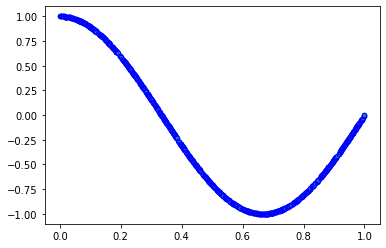

In [13]:
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)

n_samples = 1000

X_train = np.sort(np.random.rand(n_samples))
y_train = true_fun(X_train)# + np.random.randn(n_samples) * 0.1

X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test)

plt.scatter(X_train, y_train, edgecolor='b', s=20, label="data")

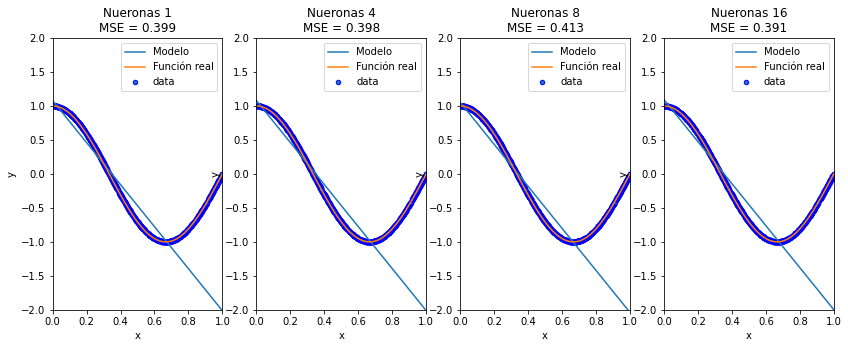

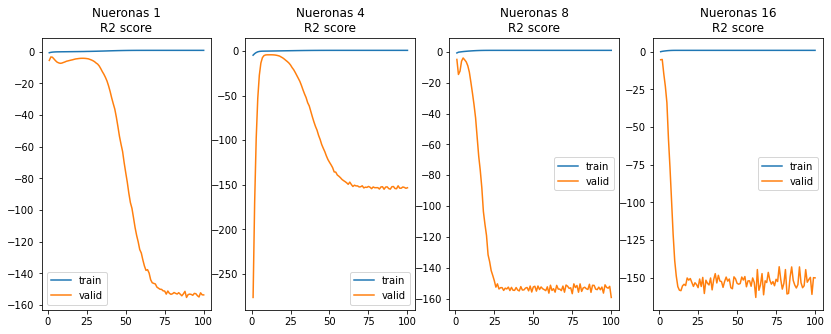

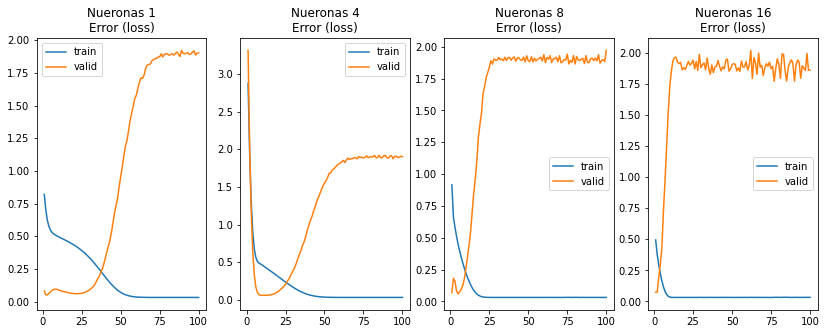

In [24]:
from sklearn.metrics import mean_squared_error

mse_train_list = []
mse_test_list = []
history_list = []
nuerons_to_plot = [1, 4, 8, 16]

plot_number = 1

fig1 = plt.figure(figsize=(14, 5))
fig2 = plt.figure(figsize=(14, 5))
fig3 = plt.figure(figsize=(14, 5))

for neurons in nuerons_to_plot:

    ax = fig1.add_subplot(1, len(nuerons_to_plot), plot_number)
    ax2 = fig2.add_subplot(1, len(nuerons_to_plot), plot_number)
    ax3 = fig3.add_subplot(1, len(nuerons_to_plot), plot_number)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures()
    poly = PolynomialFeatures(degree=1)
    
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

    model = create_model(input_size=2, hidden_neurons=neurons, output_size=1)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005),
              loss='mean_squared_error',
              metrics=[r2_keras])

    history = model.fit(X_train_poly, y_train, validation_split=0.2, epochs=100, batch_size=100, verbose=0)
    y_hat = model.predict(X_test_poly)
    y_hat_train = model.predict(X_train_poly)

    mse = mean_squared_error(y_test, y_hat)
    mse_train = mean_squared_error(y_train, y_hat_train)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse)
    history_list.append(history)

    ax.plot(X_test, y_hat, label="Modelo")
    ax.plot(X_test, y_test, label="Función real")
    ax.scatter(X_train, y_train, edgecolor='b', s=20, label="data")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("Nueronas {}\nMSE = {:.3f}".format(neurons, mse))

    epoch_count = range(1, len(history.history['r2_keras']) + 1)
    ax2.plot(epoch_count, history.history['r2_keras'], label='train')
    ax2.plot(epoch_count, history.history['val_r2_keras'], label='valid')
    ax2.legend()
    ax2.set_title("Nueronas {}\nR2 score".format(neurons))

    ax3.plot(epoch_count, history.history['loss'], label='train')
    ax3.plot(epoch_count, history.history['val_loss'], label='valid')
    ax3.legend()
    ax3.set_title("Nueronas {}\nError (loss)".format(neurons))

    plot_number += 1

plt.show()

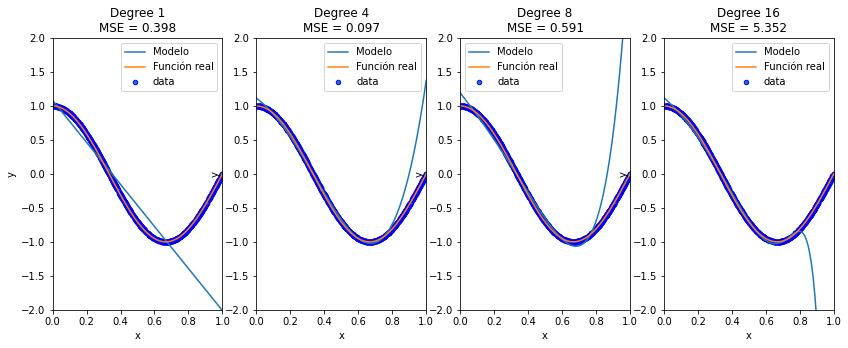

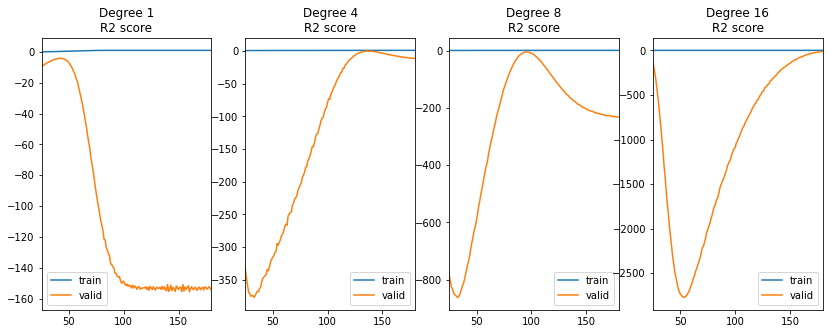

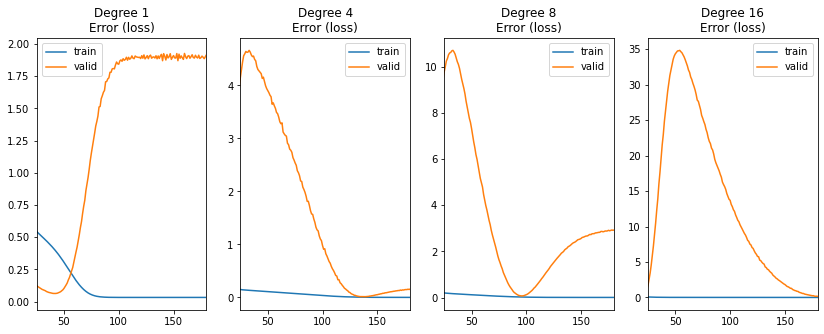

In [23]:
from sklearn.metrics import mean_squared_error

mse_train_list = []
mse_test_list = []
history_list = []
degrees_to_plot = [1, 4, 8, 16]

plot_number = 1

fig1 = plt.figure(figsize=(14, 5))
fig2 = plt.figure(figsize=(14, 5))
fig3 = plt.figure(figsize=(14, 5))

for degree in degrees_to_plot:

    ax = fig1.add_subplot(1, len(degrees_to_plot), plot_number)
    ax2 = fig2.add_subplot(1, len(degrees_to_plot), plot_number)
    ax3 = fig3.add_subplot(1, len(degrees_to_plot), plot_number)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures()
    poly = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

    model = create_model(input_size=X_train_poly.shape[1], hidden_neurons=1, output_size=1)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005),
              loss='mean_squared_error',
              metrics=[r2_keras])

    history = model.fit(X_train_poly, y_train, validation_split=0.2, epochs=500, batch_size=100, verbose=0)
    y_hat = model.predict(X_test_poly)
    y_hat_train = model.predict(X_train_poly)

    mse = mean_squared_error(y_test, y_hat)
    mse_train = mean_squared_error(y_train, y_hat_train)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse)
    history_list.append(history)

    ax.plot(X_test, y_hat, label="Modelo")
    ax.plot(X_test, y_test, label="Función real")
    ax.scatter(X_train, y_train, edgecolor='b', s=20, label="data")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("Degree {}\nMSE = {:.3f}".format(degree, mse))

    epoch_count = range(1, len(history.history['r2_keras']) + 1)
    ax2.plot(epoch_count, history.history['r2_keras'], label='train')
    ax2.plot(epoch_count, history.history['val_r2_keras'], label='valid')
    ax2.legend()
    #ax2.set_xlim(25, 180)
    ax2.set_title("Degree {}\nR2 score".format(degree))

    ax3.plot(epoch_count, history.history['loss'], label='train')
    ax3.plot(epoch_count, history.history['val_loss'], label='valid')
    ax3.legend()
    #ax3.set_xlim(25, 180)
    ax3.set_title("Degree {}\nError (loss)".format(degree))

    plot_number += 1

plt.show()